In [1]:
#script para automatizar processos de consultas
#colocando um estado ele precisa me retornar:
#--> Numero total de aeroportos com suas classificações
#-->Tipos de pavimentos de aeroportos e quantidades
#--> Total de aeroportos e sua categoria
#-->extensão total de rodovias de acordo com sua categoria


In [1]:
import geopandas as gpd
import os
import matplotlib
import matplotlib.pyplot as plt

C:\Users\carol\Downloads\python_gis\.venv\lib\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.10.1-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [58]:

def path_list():
    path_municipios = os.getcwd()+'\\dados\\municipios.shp'
    path_aeroportos = os.getcwd()+'\\dados\\aeroportos.shp'
    path_rodovias = os.getcwd()+'\\dados\\rodovias.shp'

    return [path_municipios, path_aeroportos, path_rodovias]

def open_shapefile():
          
    return [gpd.read_file(i) for i in path_list()]

def filter_municipios(state, shapes):
    
    return shapes[shapes['uf'] == state]

def airports(shape, municipio_filtrado):
    gdf = gpd.sjoin(shape, municipio_filtrado, op= 'within')
    total_airports = gdf.value_counts('TipoAero')
    total_pav = gdf.value_counts('pavimento')
    return gdf, total_airports, total_pav

def roads(shape, municipio_filtrado):
    gdf = gpd.overlay(shape, municipio_filtrado, how = 'intersection')
    gdf_proj = gdf.copy()
    gdf_proj['geometry'] = gdf['geometry'].to_crs(epsg = 5880)
    gdf_proj['distancia_km'] = gdf_proj['geometry'].length / 1000
    distancias = gdf_proj.groupby('nm_tipo_tr').agg('sum')['distancia_km']
    
    return gdf, distancias

def run(state):
    shapes = open_shapefile()
    municipio_filter = filter_municipios(state, shapes[0])
    gdf, airportos, pavimento = airports(shapes[1], municipio_filter)
    gdf_roads, stats_distance = roads(shapes[2], municipio_filter)
    print(f'Estatistica do Estado {state}')
    print(airportos)
    print(pavimento)
    gdf.plot()
    print(stats_distance)
    gdf_roads.plot()
    
    return 

Insira a sigla do estado am


C:\Users\carol\AppData\Local\Temp\ipykernel_15208\34203666.py:1: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  run(input('Insira a sigla do estado').upper())
C:\Users\carol\AppData\Local\Temp\ipykernel_15208\5449911.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  distancias = gdf_proj.groupby('nm_tipo_tr').agg('sum')['distancia_km']


Estatistica do Estado AM
TipoAero
Nacional         52
Internacional     2
dtype: int64
pavimento
asfalto ou concreto Asfáltico    35
piçarra                           8
terra                             5
cascalho                          2
areia                             1
argila                            1
concreto                          1
grama                             1
dtype: int64
nm_tipo_tr
Eixo Principal    6236.181968
Name: distancia_km, dtype: float64


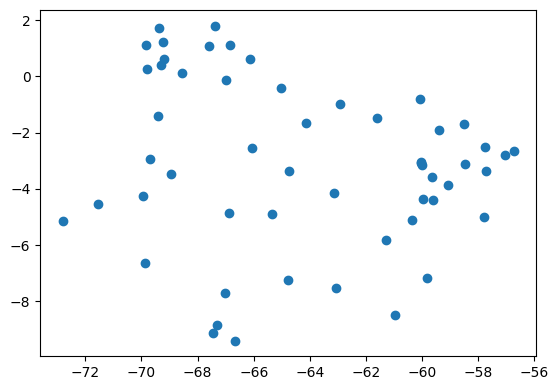

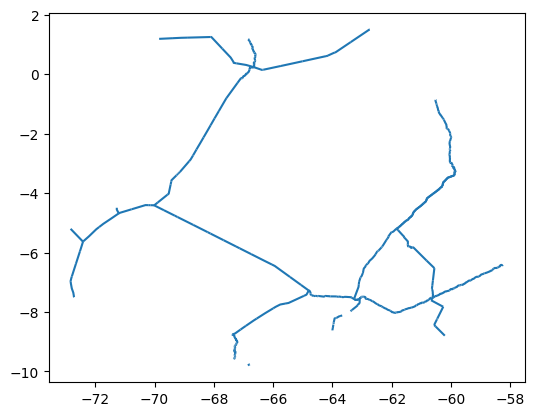

In [64]:
run(input('Insira a sigla do estado').upper())